# Read the mnist dataset

In [1]:
import keras
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


Train data is 60000 image.
Test data is 10000 image.
The 1-10 number in this datasets are:


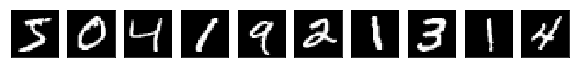

In [2]:
print("Train data is %d image." % len(x_train))
print("Test data is %d image." % len(x_test))
print("The 1-10 number in this datasets are:")
fig = plt.figure(figsize=(10,10))
for i in range(10):
    ps = fig.add_subplot(1,10,i+1, xticks=[], yticks=[])
    ps.imshow(x_train[i], cmap='gray')


# Normalization

In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the model

## optimizer
- sgd
- **adam**
- rmsprop
- adagrad
- adadelta
- adamax
- nadam

## Losses
- mean_squared_error
- mean_absolute_error
- mean_absolute_percentage_error
- mean_squared_logarithmic_error
- squared_hinge
- hinge
- categorical_hinge
- logcosh
- categorical_crossentropy
- binary_crossentropy
- kullback_leibler_divergence
- poisson
- cosine_proximity
- **sparse_categorical_crossentropy**

## metrics
- binary_accuracy
- categorical_accuracy
- sparse_categorical_accuracy
- top_k_categorical_accuracy
- sparse_top_k_categorical_accuracy
- **accuracy**

In [4]:
model = keras.models.Sequential([
  keras.layers.Flatten(),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dropout(0.2), 
  keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Fit data and evaluate the model

In [5]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 6s 97us/step - loss: 0.2217 - acc: 0.9345
Epoch 2/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.0980 - acc: 0.9699
Epoch 3/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.0702 - acc: 0.9778
Epoch 4/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.0559 - acc: 0.9821
Epoch 5/5
10000/10000 [==============================] - 0s 31us/step


[0.0869508150676731, 0.9746]

In [6]:
model.save_weights('models/mnist.h5')

model_json = model.to_json()
with open('models/mnist.json', 'w') as file:
    file.write(model_json)

[[1.6620795e-09 1.1903215e-07 9.2551372e-06 2.6111975e-03 2.1433957e-13
  8.6302492e-08 2.6365891e-12 9.9737918e-01 6.5022605e-09 1.1786841e-07]]
[[1.3198604e-08 1.1793956e-02 9.8811907e-01 7.9948826e-05 6.1308479e-11
  4.1523781e-06 2.9656729e-08 1.9146176e-12 2.6899049e-06 7.4452223e-13]]
[[1.5240991e-09 9.9994123e-01 4.2766333e-06 1.9987799e-07 1.3381973e-05
  1.4463512e-07 5.0496844e-08 2.1081729e-05 1.9436000e-05 1.1431491e-07]]
[[9.9959785e-01 7.2021868e-07 6.1638862e-06 1.6627065e-06 4.3599298e-06
  1.5173784e-05 3.2066353e-04 2.8358796e-05 1.8565588e-08 2.5044768e-05]]
[[1.16253602e-08 5.98572691e-10 1.10078304e-07 1.99943742e-10
  9.99996066e-01 2.87889323e-10 7.26460669e-09 1.10388692e-06
  1.15442456e-08 2.69687757e-06]]
[[3.1484097e-11 9.9998188e-01 6.9057218e-09 4.4966999e-09 2.8309410e-06
  5.0331985e-11 4.0269385e-11 1.4902817e-05 3.4891826e-07 1.7869629e-08]]
[[1.1907207e-12 4.6312714e-08 6.3295782e-09 1.7852263e-10 9.9998522e-01
  9.8106121e-08 2.2029091e-10 2.4551278e

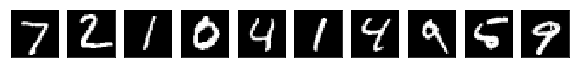

In [7]:
fig = plt.figure(figsize=(10,10))
for i in range(10):
    ps = fig.add_subplot(1,10,i+1, xticks=[], yticks=[])
    ps.imshow(x_test[i], cmap='gray')
    result = model.predict(x_test[i].reshape(1,28,28))
    print (result)

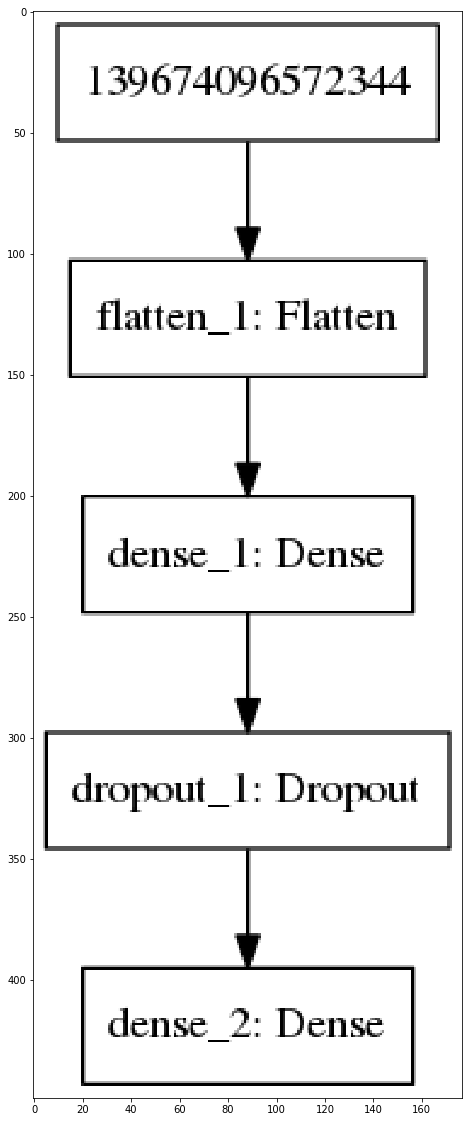

In [8]:
keras.utils.plot_model(model, to_file='models/mnist.png')
import cv2
img = cv2.imread('models/mnist.png',3)
fig = plt.figure(figsize=(20, 20))
m1 = plt.imshow(img)
plt.show()